# Programación para la Bioinformática

Unidad 5: ADN, ARN, secuencias y motivos (Parte 2)
--------------------------------------------------

### Instrucciones de uso
A continuación se presentará la teoría y algún ejemplo de algoritmo genético. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Algoritmos inspirados en la naturaleza
Existe una categoría de algoritmos que utilizan conceptos basados o inspirados en la naturaleza estableciendo una metáfora que los hace más comprensibles para los humanos. Muy populares en algoritmos de inteligencia artificial, empezaron a aparecer en la década de los 70 del siglo pasado y en la última década han explotado hasta convertirse en métodos casi estándares.

Una familia de algoritmos de inteligencia artificial inspirados en la naturaleza muy populares son los **algoritmos genéticos**. Los algoritmos genéticos utilizan conceptos de la genética, como son las mutaciones, los mecanismos de selección o los cruces. Los algoritmos genéticos se utilizan con el objetivo de optimizar valores de una función cualquiera en su espacio de valores. El funcionamiento básico del algoritmo está descrito en la siguiente figura (fuente Wikipedia - https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico):

<img src="files/media/alg_genetico.png">

* **Inicialización** (I). Se genera aleatoriamente una población inicial, constituida por un conjunto de cromosomas (o también llamados genes) que representan posibles soluciones del problema. Esta población deberá tener una diversidad inicial lo suficientemente rica para garantizar que el algoritmo no converja de forma prematura en soluciones no óptimas.
* **Evaluación** (?). Para cada uno de los cromosomas, lo evaluaremos en el espacio de búsqueda (aplicaremos la función que deseamos optimizar) y después calcularemos la distancia a la solución que queremos obtener. Esta solución objetivo es muy importante y está codificada en la función de *fitness* que dirigirá la evolución hacia esa solución óptima (podemos conocerla o no, en este segundo caso, la expresaremos en forma de función: cuán rápido es un coche, cuál es la cantidad monetaria más grande, etc.). Deberemos, además, definir las condiciones de parada del algoritmo para no entrar en bucle infinito: o bien acotando el número de pasos del algoritmo o bien cuando en la población ya no haya cambios. 
* **Selección** (Se). Si no se ha dado la condición de parada, se procede a elegir los cromosomas que serán cruzados en la siguiente generación, para ello, seleccionaremos los mejores cromosomas ordenándolos por su aptitud.
* **Cruce** (Cr). Representa en esta metáfora la reproducción sexual y opera sobre dos cromosomas a la vez para generar dos descendientes donde se combinan las características de ambos cromosomas padres.
* **Mutación** (Mu). Modifica de forma aleatoria parte del cromosoma de los individuos de la población para añadir diversidad y poder salir de pozos locales en el espacio de búsqueda.
* **Reemplazo** (Re). Una vez aplicados los operadores genéticos, se seleccionan los mejores individuos para conformar la población de la generación siguiente y continuar con otro paso de la simulación.

### Ejercicio 1
El siguiente código es una implementación de un algoritmo genético que optimiza la búsqueda de un string, es decir, dado un string **objetivo**, intentad encontrar esa cadena empezando desde diversas cadenas con caracteres aleatorios.

In [465]:
import random
import string


objetivo = "python"
generations_population_list = []

GENES = 20
MAX_GENERACION = 600

class Individuo(object): #Clase con un constructor que guarda los valores de los adn y fitness
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


def calcular_fitness(origen, valor_objetivo): #Método para calcular fitness, depediento del adn(origen) y objetivo (python)
    fitness = 0
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
        # aqui coge el código asci del carácter [i], que es un numérico  del valor_objetivo y lo resta con el código del origen[i]. Después lo eleva por 2(**2)
        #Así cada valor que obtiene lo va sumando en el fitness
        
    return fitness # devuelve valor total del fitness


def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:] 
    #Aquí coge el valor del padre1.adn[:] y guarda como adn_hijo.([:] se pone para no haga referencia al mismo objeto)

    
    start = random.randint(0, len(padre2.adn) - 1) # Start será un número aleatorio entre 0 y longitud del adn del padre
    stop = random.randint(0, len(padre2.adn) - 1) 
    if start > stop: # Si el start mayor que el stop, entonces, cambián los valores 
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop]
    #Aquí cierta longitud del adn del hijo se cambia por el adn del padre, dependiendo del start y stop

    posicion = random.randint(0, len(adn_hijo) - 1) # En posicion se guarda un número aletorio de 0 a longitud del hijo
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    #Aquí se cambia un carácter de una posición concreta del adn_hijo, sumando o restando le 1 (assci) al carácter actual.  
    fitness_hijo = calcular_fitness(adn_hijo, objetivo) # Obitene un valor numérico desde el método calcular_fitness.
    return Individuo(adn_hijo, fitness_hijo) # Devuleve objeto Individio (hijo)


def padre_al_azar(poblacion):
    #Coge un elemento aleatoriamente desde la lista población
    return poblacion[int(random.random() * random.random() * (GENES - 1))] 
    # random.random() devuelve un valor entre float(0.0, 1.0)

def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


def inicializa_poblacion():
    poblacion = []

    for i in range(0, GENES):
         # El bucle crea lista de los caracteres aleatoriamente desde la lista (string.printable[:-5]). -5, porque, los últimos 6 són espacios o none printable
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))] 
        """Es mejor poner[:-6], porque los últimos 6 aón como espacios """
        fitness = calcular_fitness(adn, objetivo) # Entra en el método de calcular_fitness() y obtiene un valor numérico
        fitness = calcular_fitness(adn, objetivo) # Entra en el método de calcular_fitness() y obtiene un valor numérico
        candidate = Individuo(adn, fitness) # Crea el objeto a partir de la clase Individuo (así pasando le dos valores al constructor de la clase)
        poblacion.append(candidate) # Lo va guardando en la lesta población, el objeto candidate
    return poblacion # Devuelve la lista población que guarda los valores del ADN y  fitness

def simulacion():
    poblacion = inicializa_poblacion() # Entra en el método inicializa_poblacion() , obtiene una lista de población
    generacion = 0 # incializando el objeto de la clase int
    
    """No veo ningún sentido del poner << True >>, ya que tiene una condición puesta."""
    while True and generacion < MAX_GENERACION: # Entra en bucle con la condición de hasta que se alcance al número máximo de la gneración(MAX_GENERACION)
        generacion += 1 # Se guarda la cantidad de la generación que se va creando. 
        poblacion.sort(key=lambda candidate: candidate.fitness)#ordena la lista poblacón por su atributo fitness de menor a mayor 
        
        if poblacion[0].fitness == 0:
            break

        padre1 = padre_al_azar(poblacion)   # Llama a un método para crear el padre aletoriamente
        padre2 = padre_al_azar(poblacion)

        hijo = mutacion(padre1, padre2) # Recive el objeto Individuo
        if hijo.fitness < poblacion[-1].fitness: # Si el valor del hijo.fitness es menor que el último valor
            poblacion[-1] = hijo # Se guarda el hijo en la última posición población
            generations_population_list.append(poblacion[:])
                       
    if generacion == MAX_GENERACION: # Si las generación llega al limite, entonce imprime lo seguiente:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion) #Al salir del bucle escribimos la boblación creada

        
simulacion()

Se ha alcanzado el máximo de generaciones
Pasos de simulación: 600

  Fitness         ADN
------------------------
   412          `pwinf
   415          `pwimf
   418          `owhmg
   433          `owhmf
   433          `owhmf
   434          `owimf
   445          _pwinf
   449          _owing
   450          `owhme
   452          _owimg
   456          _ouinf
   459          _ovinf
   462          _ovimf
   463          _owhnf
   463          _owhnf
   463          _owhnf
   464          _owinf
   464          _owinf
   464          _owinf
   434          `owimf



Es muy importante, tanto en bioinformática como en programación en general, leer e interpretar código de otros programadores. Por ello, en este ejercicio se os pide que comentéis el código anterior con comentarios en el propio código que expliquen las partes más importantes de este.

### Ejercicio 2

Escribe una función de fitness alternativa. Recuerda que fitness=0 indica que la cadena objetivo se ha conseguido. Explica en qué consiste tu función de fitness.

In [466]:
# Respuesta


def calcular_fitness2(origen, valor_objetivo):
    # Creo una lista en el que guardo los valor absolutos,obtenidos y los sumo después para gardar como fitness
    # valor: Cada valor que se guarda en la lista són:(La difrencia entre posicón de cada caracter (ascii) 
    # y multiplicado por el número de la posición en la lista, donde se ecuentra el carácter difrente)

    fitness = sum([abs(ord(origen[i])-ord(valor_objetivo[i]))*(i+1) 
                   for i in range(0, len(origen)) if valor_objetivo[i] != origen[i]]) 
    return fitness


print("ADN difrente ->  ",calcular_fitness2("pethon","python"))
print("ADN igual ->     ",calcular_fitness2("python","python"))

ADN difrente ->   40
ADN igual ->      0


### Ejercicio 3

Representa utilizando matplotlib el máximo fitness, el mínimo y la media por paso de la simulación en un gráfico:

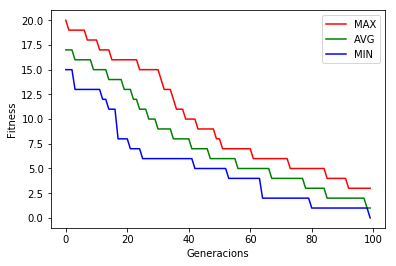

In [464]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


all_generations_persons_fitness_AVG = []
all_generations_persons_fitness_MAX = []
all_generations_persons_fitness_MIN = []


for population in generations_population_list:
    
    generation_persons_fitness_values = [person.fitness for person in population]
    
    all_generations_persons_fitness_AVG.append(int(np.average(generation_persons_fitness_values)))
    all_generations_persons_fitness_MAX.append(int(np.max(generation_persons_fitness_values)))
    all_generations_persons_fitness_MIN.append(int(np.min(generation_persons_fitness_values)))

total_generations = np.arange(len(all_generations_persons_fitness_AVG))

plt.plot(all_generations_persons_fitness_MAX[-100:], 'r')
plt.plot(all_generations_persons_fitness_AVG[-100:], 'g')
plt.plot(all_generations_persons_fitness_MIN[-100:], 'b')

plt.legend(('MAX', 'AVG','MIN'))
plt.xlabel("Generacions")
plt.ylabel("Fitness")

plt.draw()